# Clustering of neighborhoods in Toronto, Canada

### This notebook will try to scrape the following Wikipedia page: 
[https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M]

First we start by importing the important libraries we will need

In [1]:
import pandas as pd
import numpy as np
print("Library importing successful!")

Library importing successful!


Next, we feed the webpage's url into the pandas library web scraper and have a quick look at the first 5 rows of the dataframe

In [2]:
url= "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
dfs=pd.read_html(url)
df1=dfs[:][0]
df1.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


After reading the wikipedia page content into a dataframe (dfs), we then start cleaning the data from the "Not assigned" missing data

In [3]:
dfAssigned=df1[df1['Borough']!='Not assigned'].reset_index(drop=True)
dfAssigned.head(165)

print(" this shows the portion of the dataframe that has a not assigned neighbourhood",dfAssigned[dfAssigned['Neighbourhood']=='Not Assigned'].count())
dfAssigned.head(10)

 this shows the portion of the dataframe that has a not assigned neighbourhood Postal Code      0
Borough          0
Neighbourhood    0
dtype: int64


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


After making sure the 'not assigned' data is excluded, let's get the shape of the remaining dataframe (the available neighborhood data)

In [4]:
dfAssigned.shape[0]

103


Now, we need to add a column containing latitude and longitude of each neighborhood

### Latitude and longitude extraction from Geospatial data

Due to the unreliability of geocoder, we will use ready geospatial data

In [5]:
url2='http://cocl.us/Geospatial_data'
df4=pd.read_csv(url2)
df4.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Now, we have every Postal Code with the corresponding latitude and longitude

Let's create an empty dataframe and fill it with the neighbourhood information as well as add the latitude and longitude data

In [6]:
column_names = ['Postal Code', 'Borough', 'Neighborhood', 'Latitude','Longitude']

neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude


Next, we loop on the geospatial data and use postal code to combine the 2 dataframes

In [7]:

for index, row in dfAssigned.iterrows():
    PostalCode=row['Postal Code']
    Borough=row['Borough']
    Neighborhood = row['Neighbourhood']
    desiredRowDF4=df4[df4['Postal Code'] ==PostalCode].reset_index()
    Longitude =desiredRowDF4.at[0,'Longitude']
    #desiredRowDF4.at[0,'Latitude' #=Latitude
    Latitude = desiredRowDF4.at[0,'Latitude']
    neighborhoods=neighborhoods.append({'Postal Code':PostalCode,
                                        'Borough':Borough,
                                        'Neighborhood':Neighborhood,
                                        'Latitude':Latitude,
                                        'Longitude':Longitude},ignore_index=True)

neighborhoods.head(12)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Next, we direct our focus towards Boroughs that contain Toronto in their name

This means we need to filter these particular Boroughs into a new dataframe


In [8]:
neighborhoodFiltered = neighborhoods.groupby('Borough').count()
neighborhoodFiltered.head(50)

column_names = ['Postal Code', 'Borough', 'Neighborhood', 'Latitude','Longitude']

TorontoNeighborhoods = pd.DataFrame(columns=column_names)
TorontoNeighborhoods.head()
for index, row in neighborhoods.iterrows():
    PostalCode=row['Postal Code']
    Borough=row['Borough']
    Neighborhood = row['Neighborhood']
    Longitude =df4[df4['Postal Code'] ==PostalCode].reset_index().loc[0]['Longitude']
    Latitude = df4[df4['Postal Code'] == PostalCode].reset_index().loc[0]['Latitude']
    if(Borough=='Central Toronto' or Borough=='Downtown Toronto' or Borough=='East Toronto' or Borough=='West Toronto'  ):
        TorontoNeighborhoods=TorontoNeighborhoods.append({'Postal Code':PostalCode,
                                            'Borough':Borough,
                                            'Neighborhood':Neighborhood,
                                            'Latitude':Latitude,
                                            'Longitude':Longitude},ignore_index=True)

Now, let's have a look at the Toronto neighborhoods

In [9]:
print(TorontoNeighborhoods.groupby('Borough').count())
TorontoNeighborhoods.head(10)


                  Postal Code  Neighborhood  Latitude  Longitude
Borough                                                         
Central Toronto             9             9         9          9
Downtown Toronto           19            19        19         19
East Toronto                5             5         5          5
West Toronto                6             6         6          6


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


## Next, we look at the different venues for each neighborhood using Foursquare

In [10]:

import requests # library to handle requests
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

CLIENT_ID = 'TGXTPTTGJCYOTRT5M3CCOHMM5ECSYGIQ0Z4DTXICOVCNPQTK' # your Foursquare ID
CLIENT_SECRET = 'M01VUARAKIXZBUQNETPV4RH5OSEOV2AVG5EAISWMLT1J1SAL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query="Gym"&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



Your credentails:
CLIENT_ID: TGXTPTTGJCYOTRT5M3CCOHMM5ECSYGIQ0Z4DTXICOVCNPQTK
CLIENT_SECRET:M01VUARAKIXZBUQNETPV4RH5OSEOV2AVG5EAISWMLT1J1SAL


We use the nearbyvenues function defined in the lab to extract venues for each of the Toronto neighborhoods:

In [11]:
#toronto_venues.head()
toronto_venues = getNearbyVenues(names=TorontoNeighborhoods['Neighborhood'],
                                   latitudes=TorontoNeighborhoods['Latitude'],
                                   longitudes=TorontoNeighborhoods['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

Let's have a look at the different venues for each neighborhood

In [12]:
print(toronto_venues.shape)
toronto_venues.groupby('Neighborhood').count()
toronto_venues.head()

(293, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
1,"Regent Park, Harbourfront",43.654260,-79.360636,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
2,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown District Lofts Gym,43.655652,-79.358125,Gym
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Hart House Gym,43.664172,-79.394888,Gym
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio



We can see that a lot of venues are irrelevant to our purposes and that they need to be cleaned from venues not related to sports

In [13]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
print(toronto_venues['Venue Category'].unique())
#print(toronto_venues[toronto_venues['Venue Category']=='coffee'].count())
print(toronto_venues[toronto_venues['Venue Category']=='Gym'].count())

There are 19 uniques categories.
['Gym / Fitness Center' 'Yoga Studio' 'Gym' 'Student Center' 'College Gym'
 'Hotel Pool' 'College Academic Building' 'High School' 'Gym Pool'
 'Martial Arts School' 'Hotel' 'Residential Building (Apartment / Condo)'
 'Building' 'Pool' 'Climbing Gym' 'Cycle Studio' 'Bath House'
 'Medical Center' 'Pilates Studio']
Neighborhood              134
Neighborhood Latitude     134
Neighborhood Longitude    134
Venue                     134
Venue Latitude            134
Venue Longitude           134
Venue Category            134
dtype: int64


Here are the irrelevant venue categories that needed to be excluded from Foursquare's returned venues

In [14]:
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Residential Building (Apartment / Condo)"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="College Academic Building"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Student Center"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="High School"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Bath House"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Building"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Bath House"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Medical Center"]
toronto_venues=toronto_venues[toronto_venues['Venue Category']!="Hotel"]
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
print(toronto_venues['Venue Category'].unique())
print(toronto_venues[toronto_venues['Venue Category']=='Gym'].count())
toronto_venues

There are 11 uniques categories.
['Gym / Fitness Center' 'Yoga Studio' 'Gym' 'College Gym' 'Hotel Pool'
 'Gym Pool' 'Martial Arts School' 'Pool' 'Climbing Gym' 'Cycle Studio'
 'Pilates Studio']
Neighborhood              134
Neighborhood Latitude     134
Neighborhood Longitude    134
Venue                     134
Venue Latitude            134
Venue Longitude           134
Venue Category            134
dtype: int64


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
1,"Regent Park, Harbourfront",43.654260,-79.360636,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
2,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown District Lofts Gym,43.655652,-79.358125,Gym
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Hart House Gym,43.664172,-79.394888,Gym
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
...,...,...,...,...,...,...,...
288,Church and Wellesley,43.665860,-79.383160,Studio Pilates,43.665388,-79.380991,Pilates Studio
289,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,barre3,43.664538,-79.324585,Gym / Fitness Center
290,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,ONE Academy,43.662253,-79.326911,Gym / Fitness Center
291,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Toronto Yoga Mamas,43.664824,-79.324335,Yoga Studio


Now, we revert to one-hot encoding in order to prepare the inputs for k-clustering

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)

toronto_grouped.head(20)



In [15]:

column_names = ['Neighborhood', 'number of gym venues','venues per capita','average income','population','area/capita','Latitude','Longitude']

toronto_full_info = pd.DataFrame(columns=column_names)
toronto_full_info.head()
#    desiredRowDF4=df4[df4['Postal Code'] ==PostalCode].reset_index()

for index, row in TorontoNeighborhoods.iterrows():
    Neighborhood = row['Neighborhood']
    Longitude =row['Longitude']
    Latitude =row['Latitude']
    toronto_full_info=toronto_full_info.append({'Neighborhood':Neighborhood,
                                        'number of gym venues':0,
                                        'venues per capita':0,
                                        'average income':0.0,
                                        'population':0.0,
                                        'area/capita':0.0,     
                                        'Latitude':Latitude,
                                        'Longitude':Longitude},ignore_index=True)

#toronto_full_info.set_index("Neighborhood", inplace = True)
for index, row in toronto_venues.iterrows():
    Neighborhood = row['Neighborhood']
    for index2, row2 in toronto_full_info.iterrows():
        if row2['Neighborhood']==Neighborhood:
            toronto_full_info.at[index2,'number of gym venues']=toronto_full_info.at[index2,'number of gym venues']+1

toronto_full_info.head()
toronto_full_info.sort_values('number of gym venues',ascending = False )


#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#neighborhoods_venues_sorted['Cluster Labels'].unique()
#toronto_merged = neighborhoods_venues_sorted

#toronto_merged.head()
#for index, row in toronto_merged.iterrows():
#    Neighborhood = row['Neighborhood']
#    Longitude =neighborhoods[neighborhoods['Neighborhood'] ==Neighborhood].reset_index().loc[0]['Longitude']
#    Latitude = neighborhoods[neighborhoods['Neighborhood'] == Neighborhood].reset_index().loc[0]['Latitude']
#    toronto_merged.at[index,'Longitude']=Longitude
#    toronto_merged.at[index,'Latitude']=Latitude
#toronto_merged.head(100)

,Neighborhood,number of gym venues,venues per capita,average income,population,area/capita,Latitude,Longitude
8,"Richmond, Adelaide, King",23,0,0.0,0.0,0.0,43.650571,-79.384568
16,"Commerce Court, Victoria Hotel",22,0,0.0,0.0,0.0,43.648198,-79.379817
36,"First Canadian Place, Underground city",21,0,0.0,0.0,0.0,43.648429,-79.382280
2,"Garden District, Ryerson",19,0,0.0,0.0,0.0,43.657162,-79.378937
37,Church and Wellesley,19,0,0.0,0.0,0.0,43.665860,-79.383160
13,"Toronto Dominion Centre, Design Exchange",18,0,0.0,0.0,0.0,43.647177,-79.381576
3,St. James Town,18,0,0.0,0.0,0.0,43.651494,-79.375418
6,Central Bay Street,18,0,0.0,0.0,0.0,43.657952,-79.387383
34,Stn A PO Boxes,15,0,0.0,0.0,0.0,43.646435,-79.374846
10,"Harbourfront East, Union Station, Toronto Islands",13,0,0.0,0.0,0.0,43.640816,-79.381752


In [ ]:

import types
import pandas as pd
!pip install botocore
from botocore.client import Config
!pip install ibm_boto3
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fa75c403a94949d08ab0e94179e5d534 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wj249fnyEMnfkSi_3Ukr0cmI1JLkgz95919hwqKwol2h',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fa75c403a94949d08ab0e94179e5d534.get_object(Bucket='courseracapstone-donotdelete-pr-3wfwqikpi944pt',Key='Toronto census data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
#df_data_0.rename(columns={'Unnamed: 0':'Neighborhood'},inplace=True)
#df_data_0['population'] = df_data_1['population'].astype(float)
#df_data_0.head()
#data.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )

In [16]:

df_data_2 = pd.read_csv("Toronto census data.csv")

df_data_2.head()

,Neighborhood,population,land area (km^2),density (people/km^2),% change in populatioon since 2001,Average income,transit commuting %,% renters
0,"Regent Park, Harbourfront",10387.0,0.64,16230.0,-7.1,19521.0,16.0,31.2
1,"Queen's Park, Ontario Provincial Government",6045.0,0.56,10795.0,62.6,105239.0,18.3,27.9
2,"Garden District, Ryerson",8240.0,0.52,15846.0,17.0,37614.0,17.0,35.5
3,St. James Town,14666.0,0.23,63765.0,-10.0,22341.0,27.4,46.2
4,The Beaches,20416.0,3.57,5719.0,7.8,67536.0,13.8,16.2


Now, let's look at the top 5 venues for each neighborhood

In [17]:
for index, row in df_data_2.iterrows():
    Neighborhood = row['Neighborhood']
    for index2, row2 in toronto_full_info.iterrows():
        if row2['Neighborhood']==Neighborhood:
            toronto_full_info.at[index2,'population']=row['population']
            toronto_full_info.at[index2,'average income']=row['Average income']
            toronto_full_info.at[index2,'area/capita']=row['land area (km^2)']/row['population']*1000.0

toronto_full_info['venues per capita']=toronto_full_info['number of gym venues']/toronto_full_info['population']
print(toronto_full_info.head())
toronto_full_info.sort_values('venues per capita',ascending = False )

                                  Neighborhood number of gym venues  \
0                    Regent Park, Harbourfront                    3   
1  Queen's Park, Ontario Provincial Government                    9   
2                     Garden District, Ryerson                   19   
3                               St. James Town                   18   
4                                  The Beaches                    0   

  venues per capita  average income  population  area/capita   Latitude  \
0       0.000288823         19521.0     10387.0     0.061615  43.654260   
1        0.00148883        105239.0      6045.0     0.092639  43.662301   
2        0.00230583         37614.0      8240.0     0.063107  43.657162   
3        0.00122733         22341.0     14666.0     0.015683  43.651494   
4                 0         67536.0     20416.0     0.174863  43.676357   

   Longitude  
0 -79.360636  
1 -79.389494  
2 -79.378937  
3 -79.375418  
4 -79.293031  


,Neighborhood,number of gym venues,venues per capita,average income,population,area/capita,Latitude,Longitude
16,"Commerce Court, Victoria Hotel",22,0.040146,63952.00,548.00,0.857664,43.648198,-79.379817
13,"Toronto Dominion Centre, Design Exchange",18,0.0328467,63952.00,548.00,0.857664,43.647177,-79.381576
5,Berczy Park,7,0.0122592,36243.00,571.00,10.683012,43.644771,-79.373306
36,"First Canadian Place, Underground city",21,0.00549594,46086.00,3821.00,0.557446,43.648429,-79.382280
8,"Richmond, Adelaide, King",23,0.00495476,63282.00,4642.00,0.211116,43.650571,-79.384568
6,Central Bay Street,18,0.00376018,40598.00,4787.00,0.022979,43.657952,-79.387383
2,"Garden District, Ryerson",19,0.00230583,37614.00,8240.00,0.063107,43.657162,-79.378937
1,"Queen's Park, Ontario Provincial Government",9,0.00148883,105239.00,6045.00,0.092639,43.662301,-79.389494
37,Church and Wellesley,19,0.00141823,37653.00,13397.00,0.041054,43.665860,-79.383160
11,"Little Portugal, Trinity",7,0.00139637,29224.00,5013.00,0.097746,43.647927,-79.419750


In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5
toronto_grouped_clustering = toronto_full_info[['venues per capita','average income','area/capita']]

#toronto_grouped_clustering = toronto_full_info.drop('Neighborhood', 1)

toronto_grouped_clustering.head(10)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 
toronto_grouped_clustering.head(1000)

Now, lets use a similar version of the return most common venues function used in the labs:

In [18]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing
# set number of clusters
kclusters = 4
#toronto_grouped_clustering = toronto_full_info[['venues per capita','average income','area/capita']]
toronto_grouped_clustering = toronto_full_info[['venues per capita','average income']]

X= preprocessing.StandardScaler().fit(toronto_grouped_clustering).transform(toronto_grouped_clustering)

toronto_grouped_clustering.head(10)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 
toronto_grouped_clustering.head(1000)

,venues per capita,average income
0,0.000288823,19521.00
1,0.00148883,105239.00
2,0.00230583,37614.00
3,0.00122733,22341.00
4,0,67536.00
5,0.0122592,36243.00
6,0.00376018,40598.00
7,0.00019516,30556.00
8,0.00495476,63282.00
9,0.000202532,27961.00


Now, we perform the k-means clustering
N.B. It was found that using only 5 clusters show very uneven distribution of clusters over the neighborhoods (most are in cluster 0) so the number of clusters was increased to 8

Then, we add the cluster label to the neighborhood venues dataframe

In [24]:
# add clustering labels
toronto_full_info_new= toronto_full_info[:]
print(toronto_full_info_new.head())
toronto_full_info_new.insert(0, 'Cluster Labels', kmeans.labels_)
print(toronto_full_info_new.head())

                                  Neighborhood number of gym venues  \
0                    Regent Park, Harbourfront                    3   
1  Queen's Park, Ontario Provincial Government                    9   
2                     Garden District, Ryerson                   19   
3                               St. James Town                   18   
4                                  The Beaches                    0   

  venues per capita  average income  population  area/capita   Latitude  \
0       0.000288823         19521.0     10387.0     0.061615  43.654260   
1        0.00148883        105239.0      6045.0     0.092639  43.662301   
2        0.00230583         37614.0      8240.0     0.063107  43.657162   
3        0.00122733         22341.0     14666.0     0.015683  43.651494   
4                 0         67536.0     20416.0     0.174863  43.676357   

   Longitude  
0 -79.360636  
1 -79.389494  
2 -79.378937  
3 -79.375418  
4 -79.293031  
   Cluster Labels               

In [31]:

toronto_full_info_new[toronto_full_info_new['Cluster Labels'] ==1]
dfCluster_1=toronto_full_info_new[toronto_full_info_new['Cluster Labels'] ==0]
dfCluster_2=toronto_full_info_new[toronto_full_info_new['Cluster Labels'] ==1]
dfCluster_3=toronto_full_info_new[toronto_full_info_new['Cluster Labels'] ==2]
dfCluster_4=toronto_full_info_new[toronto_full_info_new['Cluster Labels'] ==3]
dfCluster_1["venues per capita"].std()



0.002662312242540223

In [33]:
toronto_full_info_new['Cluster Labels'].unique()
toronto_merged = toronto_full_info_new

toronto_merged.head()
for index, row in toronto_merged.iterrows():
    Neighborhood = row['Neighborhood']
    Longitude =neighborhoods[neighborhoods['Neighborhood'] ==Neighborhood].reset_index().loc[0]['Longitude']
    Latitude = neighborhoods[neighborhoods['Neighborhood'] == Neighborhood].reset_index().loc[0]['Latitude']
    toronto_merged.at[index,'Longitude']=Longitude
    toronto_merged.at[index,'Latitude']=Latitude
toronto_merged.head(100)

,Cluster Labels,Neighborhood,number of gym venues,venues per capita,average income,population,area/capita,Latitude,Longitude
0,0,"Regent Park, Harbourfront",3,0.000288823,19521.00,10387.00,0.061615,43.654260,-79.360636
1,3,"Queen's Park, Ontario Provincial Government",9,0.00148883,105239.00,6045.00,0.092639,43.662301,-79.389494
2,0,"Garden District, Ryerson",19,0.00230583,37614.00,8240.00,0.063107,43.657162,-79.378937
3,0,St. James Town,18,0.00122733,22341.00,14666.00,0.015683,43.651494,-79.375418
4,3,The Beaches,0,0,67536.00,20416.00,0.174863,43.676357,-79.293031
5,0,Berczy Park,7,0.0122592,36243.00,571.00,10.683012,43.644771,-79.373306
6,0,Central Bay Street,18,0.00376018,40598.00,4787.00,0.022979,43.657952,-79.387383
7,0,Christie,1,0.00019516,30556.00,5124.00,0.124902,43.669542,-79.422564
8,0,"Richmond, Adelaide, King",23,0.00495476,63282.00,4642.00,0.211116,43.650571,-79.384568
9,0,"Dufferin, Dovercourt Village",2,0.000202532,27961.00,9875.00,0.100253,43.669005,-79.442259


Now, we prepare the libraries necessary for plotting the map using folium

In [34]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Finally, let's see how the clusters are distributed over the map:

N.B. each cluster is represented by a different color

Here, we plot the whole group of sporting venues regardless of which neighborhood they belong to

In [36]:
latitude = 43.6532
longitude = -79.3832
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_full_info_new['Latitude'], toronto_full_info_new['Longitude'], toronto_full_info_new['Neighborhood'], toronto_full_info_new['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
latitude = 43.6532
longitude = -79.3832
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Neighborhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
latitude = 43.6532
longitude = -79.3832
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_full_info_new['Latitude'], toronto_full_info_new['Longitude'], toronto_full_info_new['Neighborhood'], toronto_full_info_new['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
toronto_full_info_new[["venues per capita"]]
toronto_full_info[toronto_full_info["average income", "venues per capita"]].corr()
#sns.regplot(x="venues per capita", y="average income", data=toronto_full_info_new)
#plt.ylim(0,)
#sns.boxplot(x="average income", y="venues per capita", data=dfCluster_1)

,average income,population,area/capita
average income,1.000000,-0.179228,-0.040223
population,-0.179228,1.000000,-0.274299
area/capita,-0.040223,-0.274299,1.000000


Text(0.5, 1.0, 'Comparison of venues per capita among the 4 clusters')

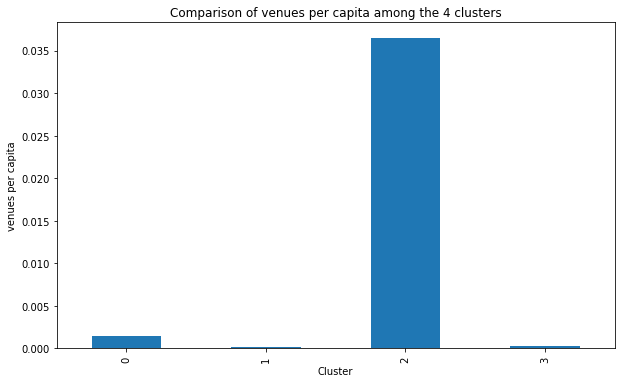

In [101]:
#sns.boxplot(x="average income", data=dfCluster_1, color="blue")
#sns.boxplot(x="average income", data=dfCluster_2, color="red")
#sns.boxplot(x="average income", data=dfCluster_3, color="green")
#sns.boxplot(x="average income", data=dfCluster_4, color="black")
#toronto_full_info.at[index2,'number of gym venues']=toronto_full_info.at[index2,'number of gym venues']+1


column_names = ['cluster', 'average income']
column_names2 = ['cluster', 'venues per capita']

averageIncomeDF = pd.DataFrame(columns=column_names)
averageVenuesPerCap= pd.DataFrame(columns=column_names2)
#dfCluster_1["average income"].plot(kind='bar', figsize=(10, 6))
averageIncomeDF.at[0,'cluster']=1
averageIncomeDF.at[1,'cluster']=2
averageIncomeDF.at[2,'cluster']=3
averageIncomeDF.at[3,'cluster']=4

averageVenuesPerCap.at[0,'cluster']=1
averageVenuesPerCap.at[1,'cluster']=2
averageVenuesPerCap.at[2,'cluster']=3
averageVenuesPerCap.at[3,'cluster']=4

averageIncomeDF.at[0,'average income']=dfCluster_1["average income"].mean()
averageIncomeDF.at[1,'average income']=dfCluster_2["average income"].mean()
averageIncomeDF.at[2,'average income']=dfCluster_3["average income"].mean()
averageIncomeDF.at[3,'average income']=dfCluster_4["average income"].mean()


averageVenuesPerCap.at[0,'venues per capita']=dfCluster_1["venues per capita"].mean()
averageVenuesPerCap.at[1,'venues per capita']=dfCluster_2["venues per capita"].mean()
averageVenuesPerCap.at[2,'venues per capita']=dfCluster_3["venues per capita"].mean()
averageVenuesPerCap.at[3,'venues per capita']=dfCluster_4["venues per capita"].mean()
averageVenuesPerCap.head()
averageVenuesPerCap["venues per capita"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster')
plt.ylabel('venues per capita')
plt.title('Comparison of venues per capita among the 4 clusters')

Text(0.5, 1.0, 'Comparison of average income among the 4 clusters')

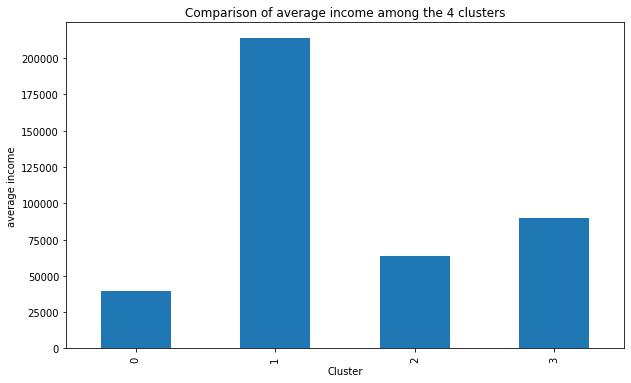

In [98]:

averageIncomeDF["average income"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster')
plt.ylabel('average income')
plt.title('Comparison of average income among the 4 clusters')

Text(0.5, 1.0, 'Venues per capita across Toronto')

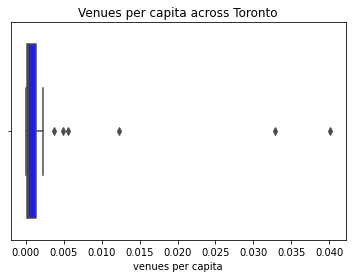

In [110]:
sns.boxplot(x="venues per capita", data=toronto_full_info, color="blue")

plt.xlabel('venues per capita')
plt.title('Venues per capita across Toronto')